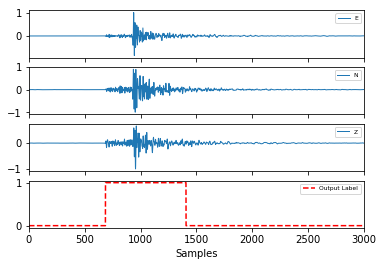

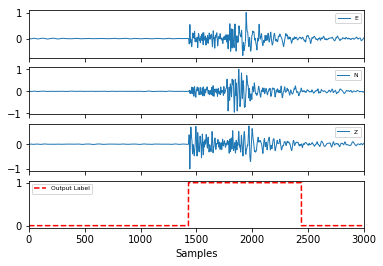

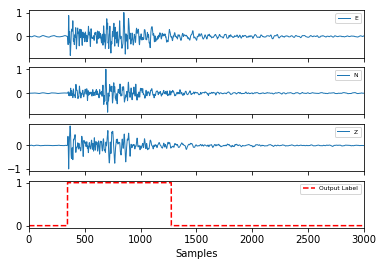

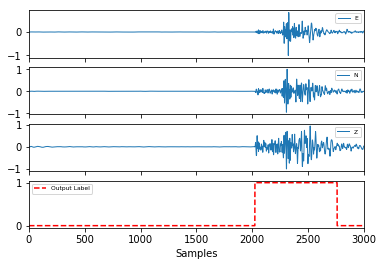

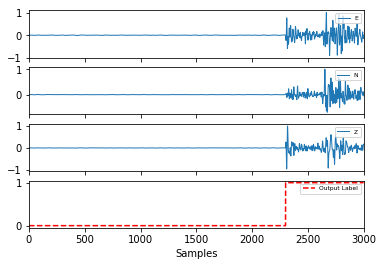

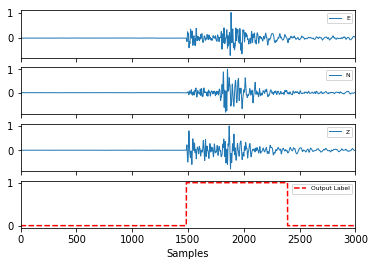

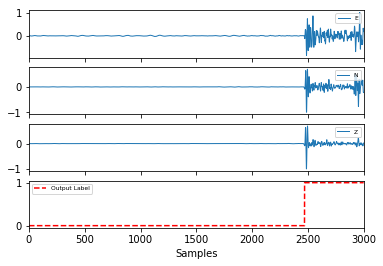

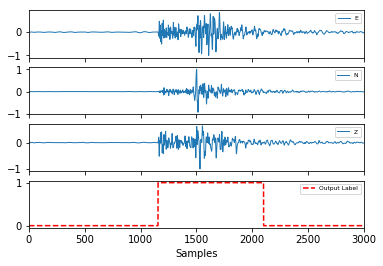

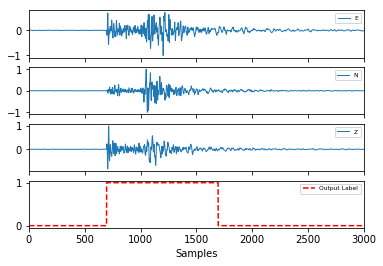

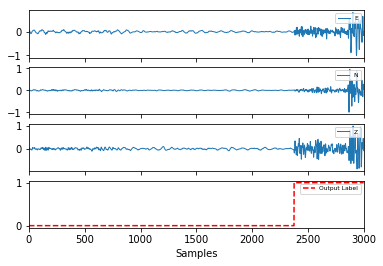

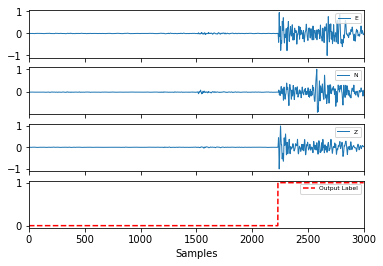

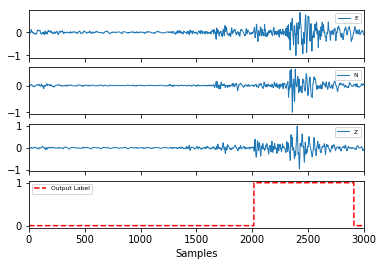

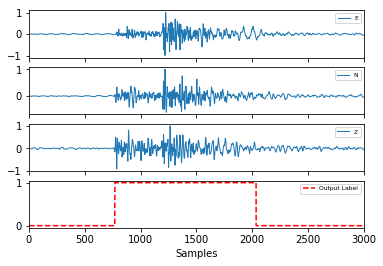

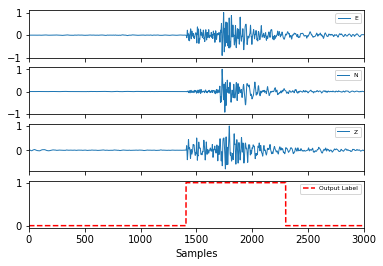

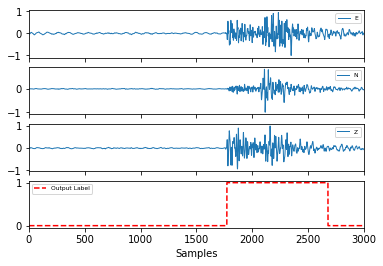

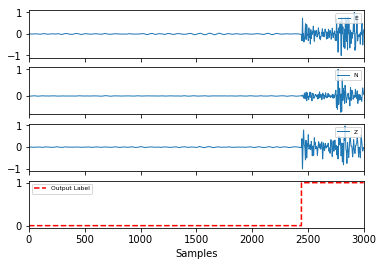

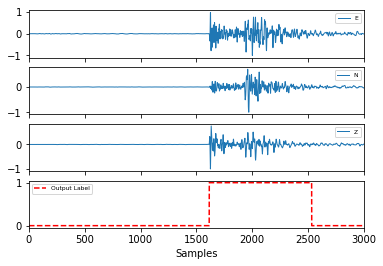

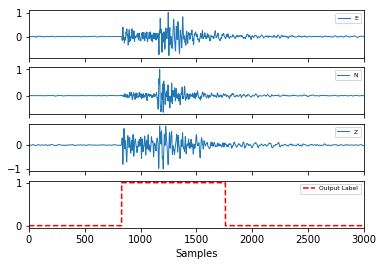

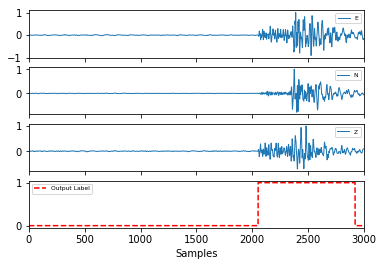

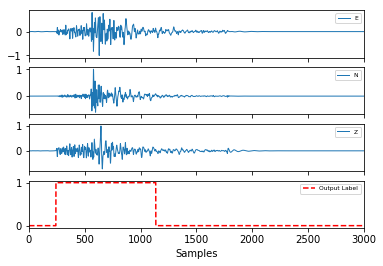

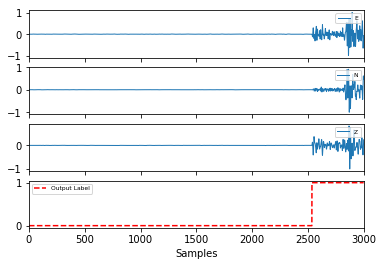

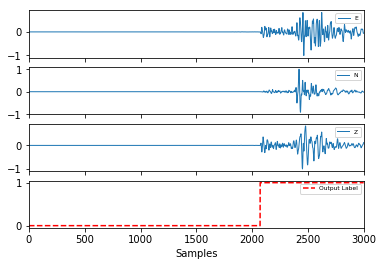

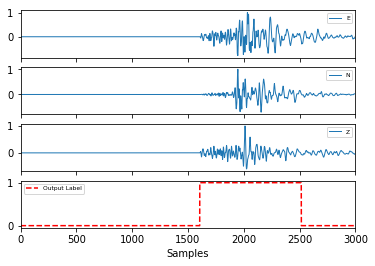

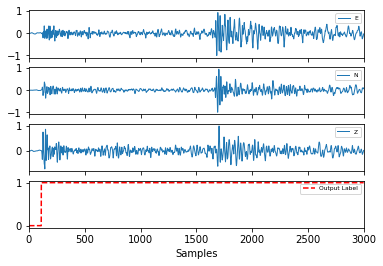

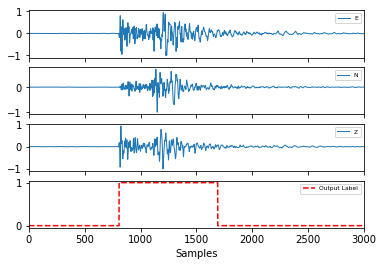

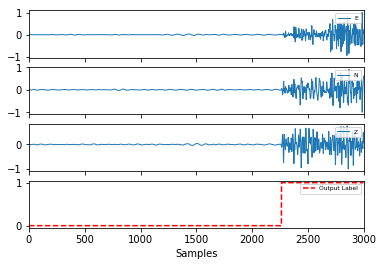

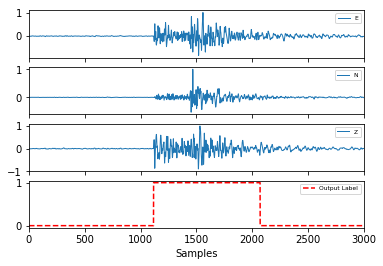

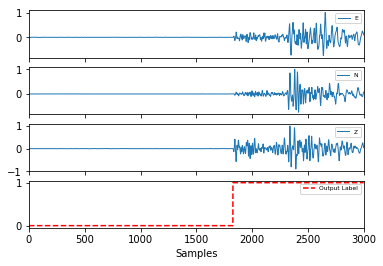

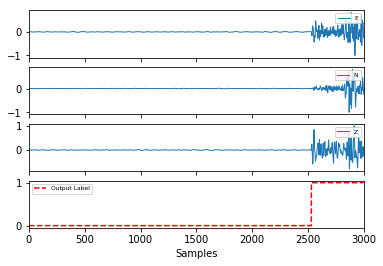

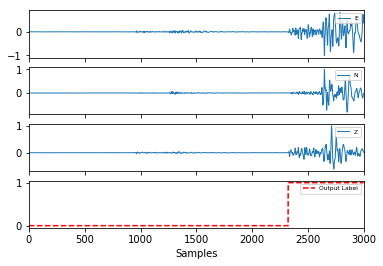

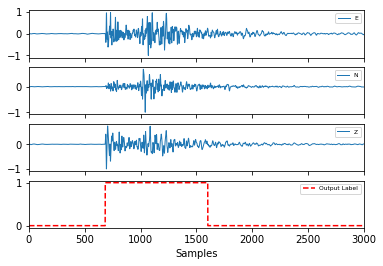

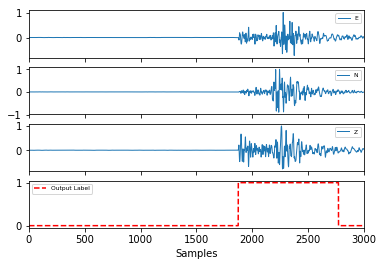

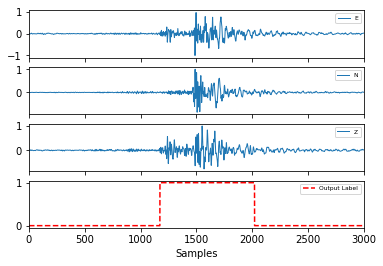

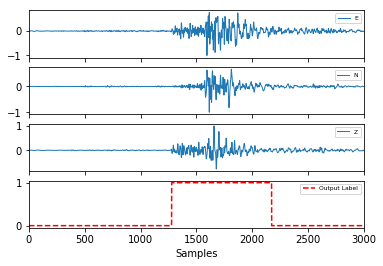

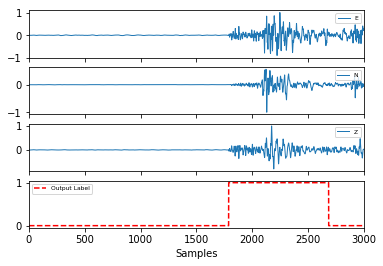

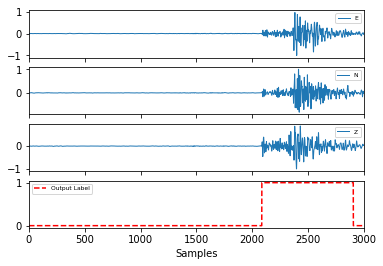

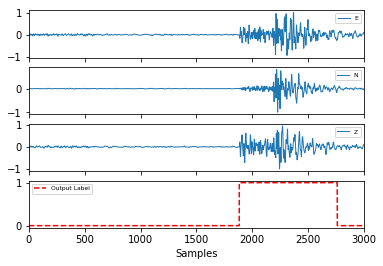

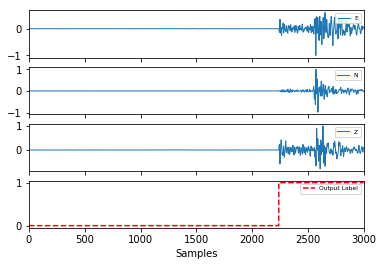

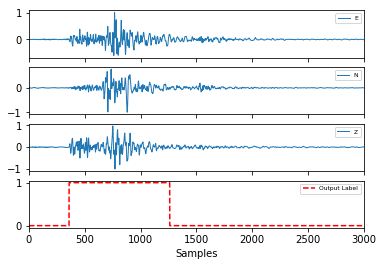

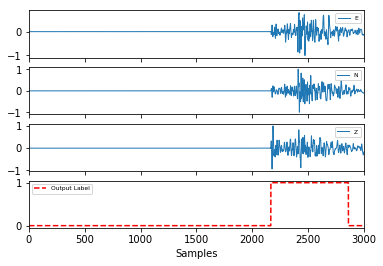

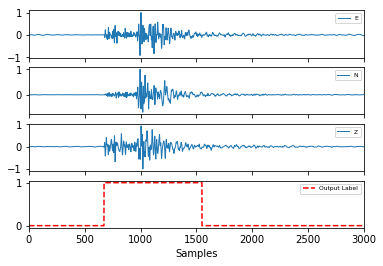

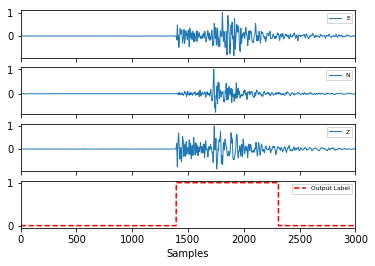

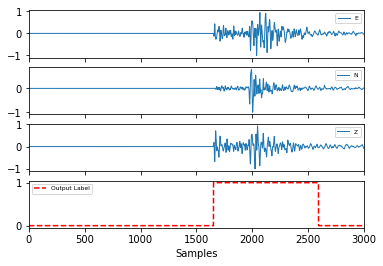

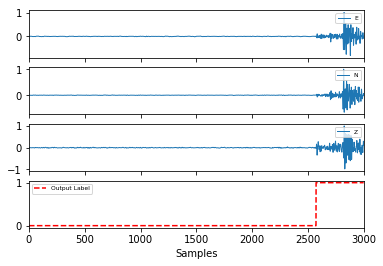

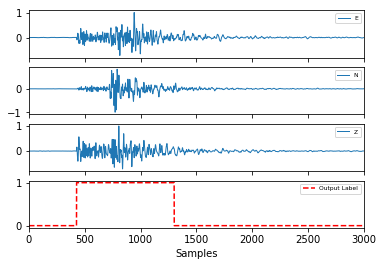

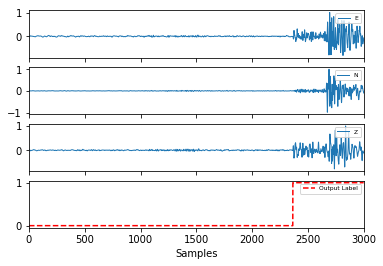

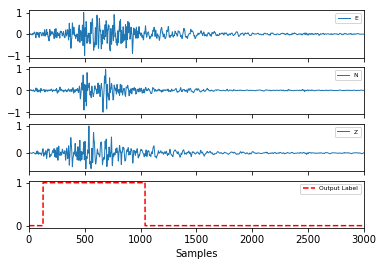

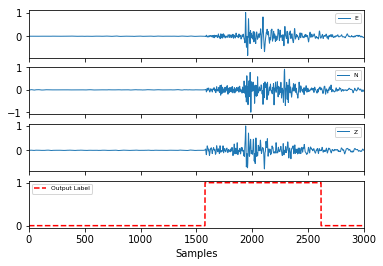

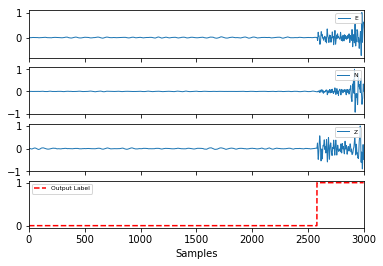

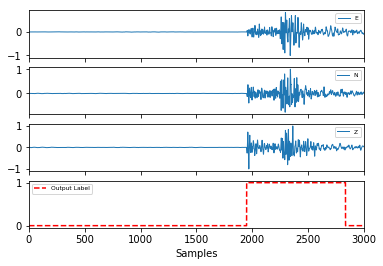

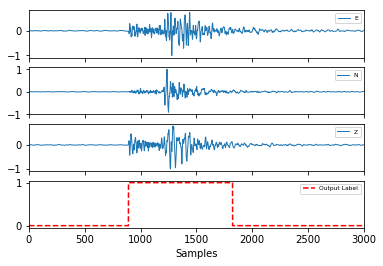

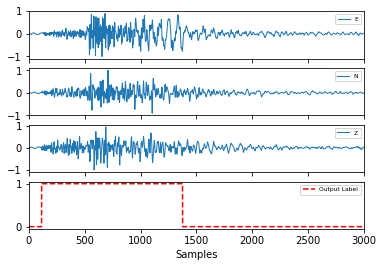

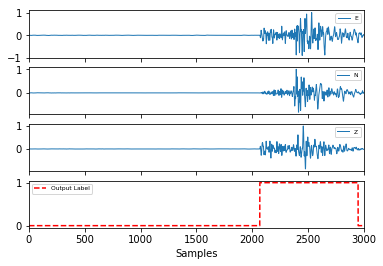

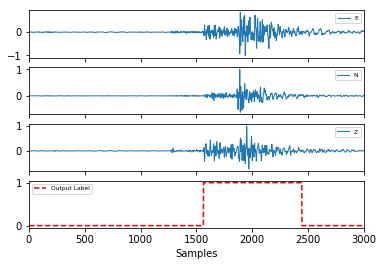

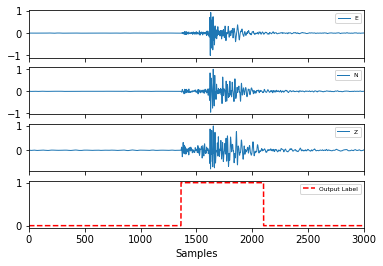

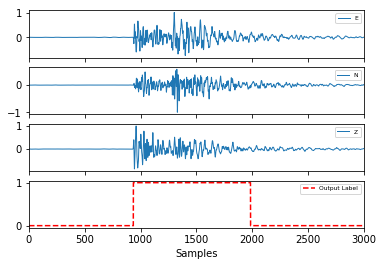

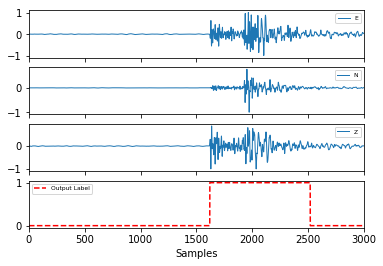

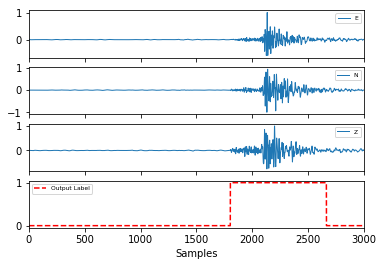

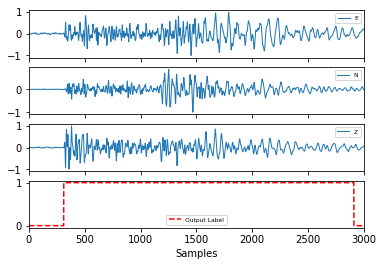

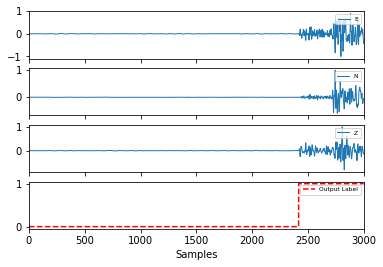

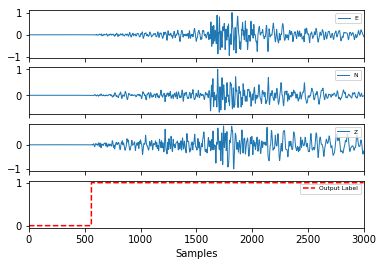

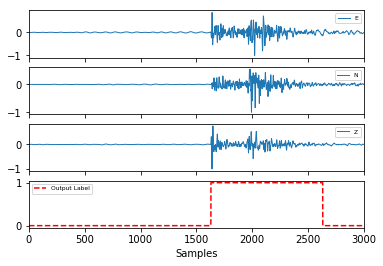

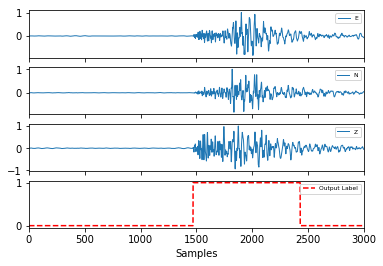

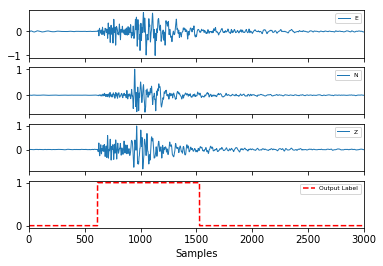

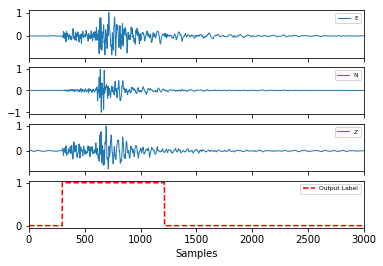

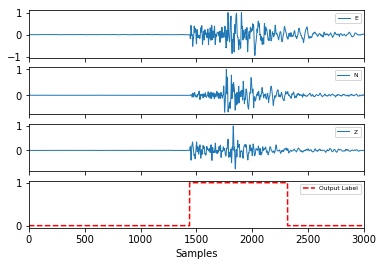

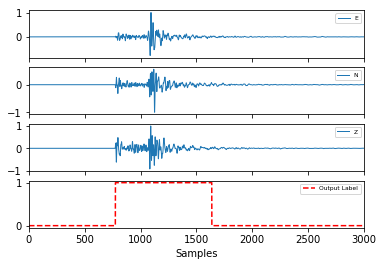

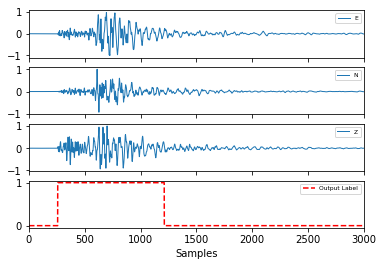

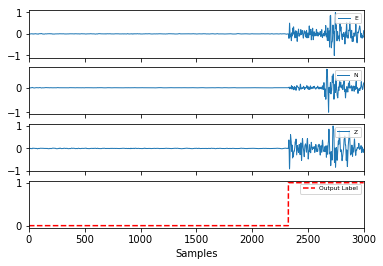

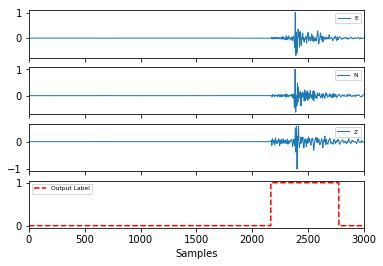

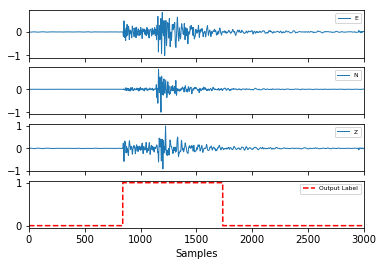

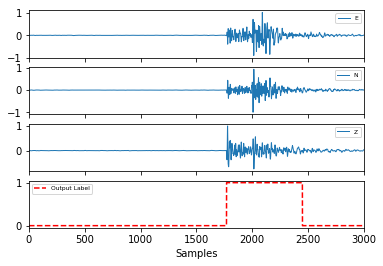

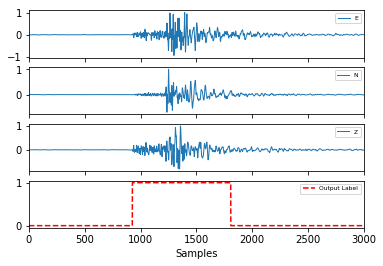

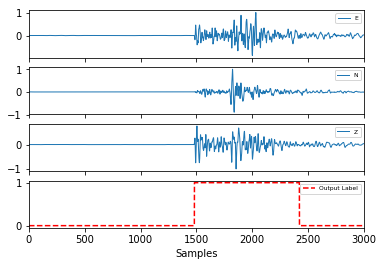

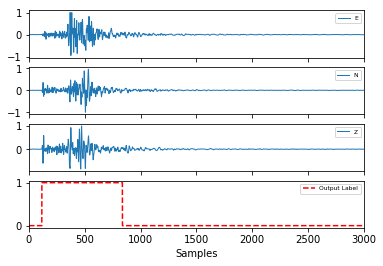

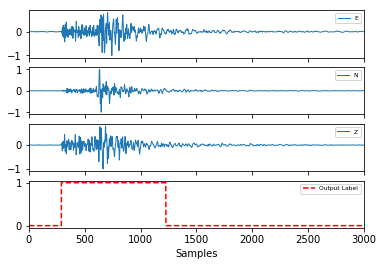

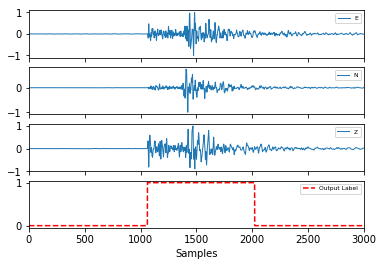

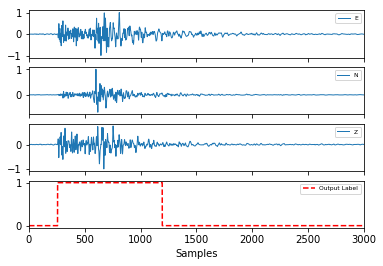

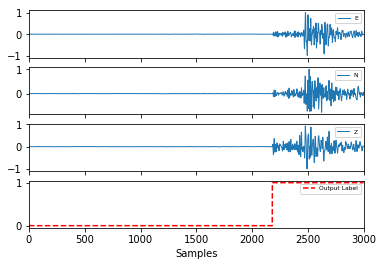

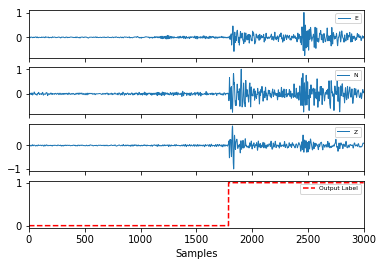

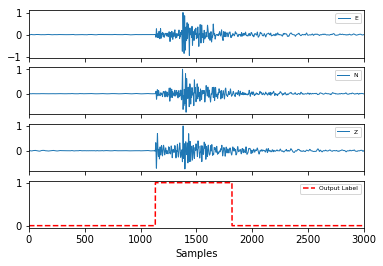

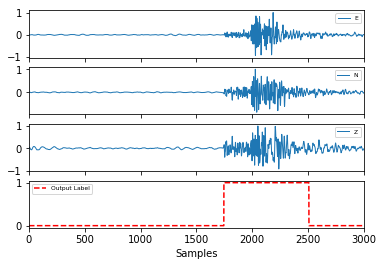

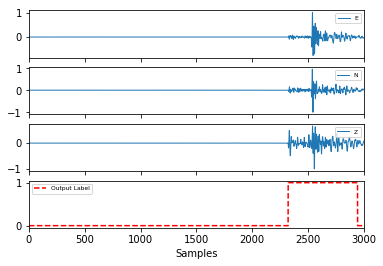

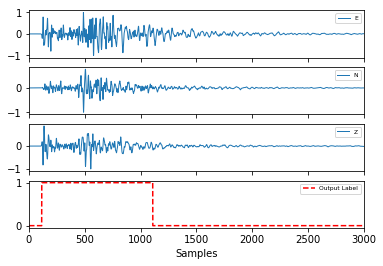

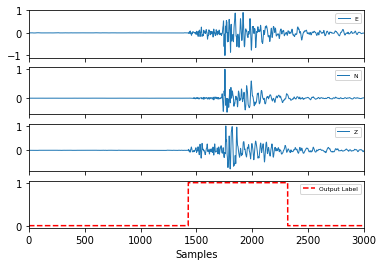

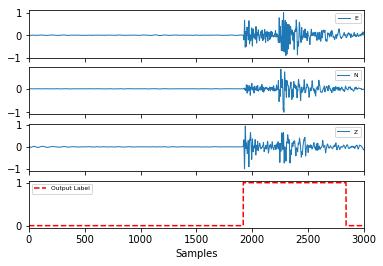

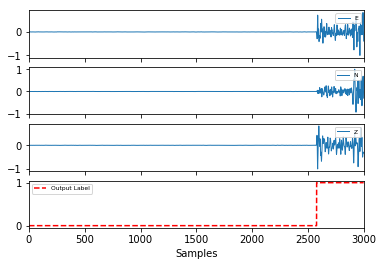

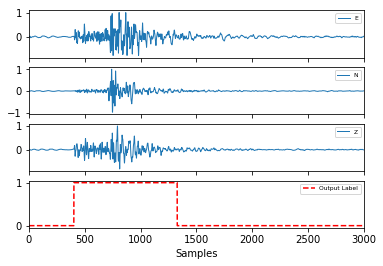

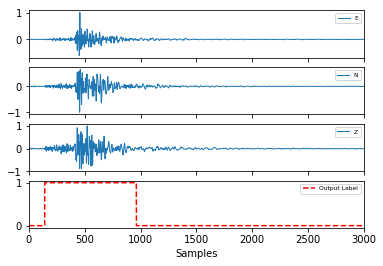

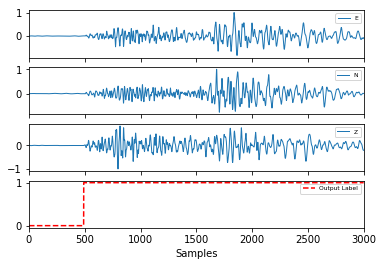

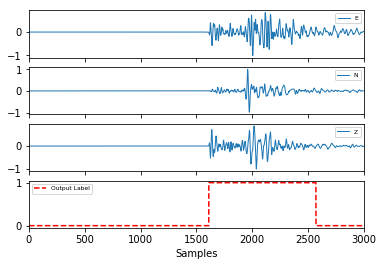

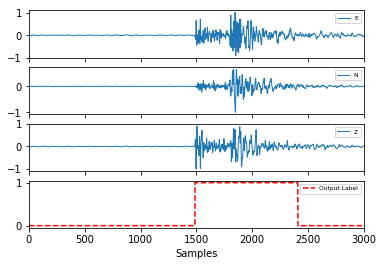

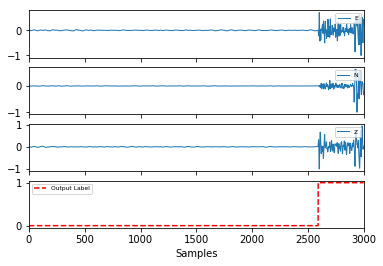

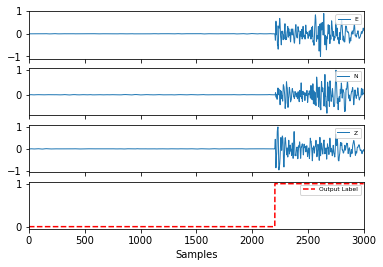

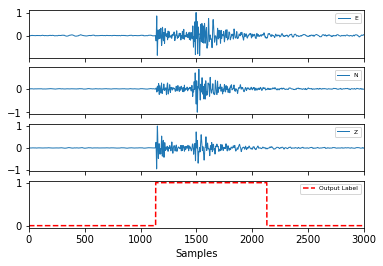

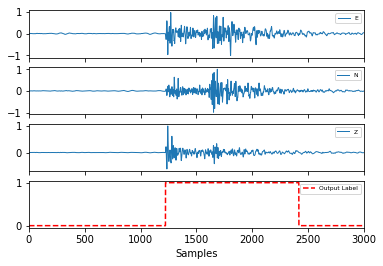

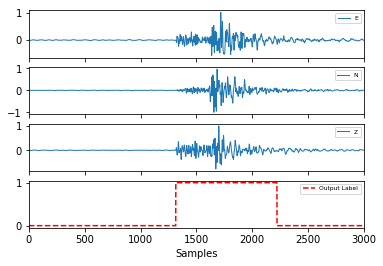

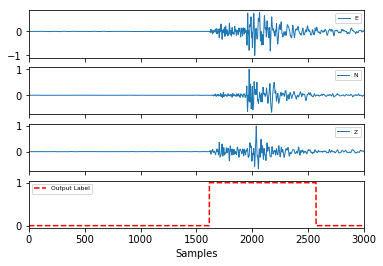

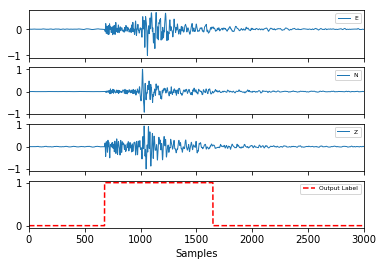

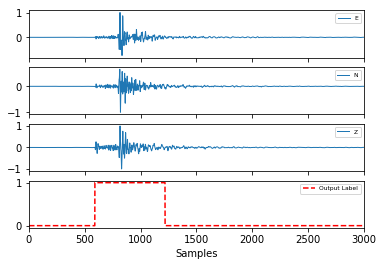

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.models import model_from_json

# Loading the pre-trained Model
# load and create json model
json_file = open('PreTrained_SCALODEEP.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
SCALODeep = model_from_json(loaded_model_json)

# loading weigths and biases for each SCALODEEP layer
for i in range(0,131):
    if i == 63:
        w1 = np.load(r'./LayersWeights/LayerW' + str(i) + 'a.npz')['az']
        w2 = np.load(r'./LayersWeights/LayerW' + str(i) + 'b.npz')['az']
        w = [w1,w2]
        SCALODeep.layers[i].set_weights(w)
    else:
        if i >=99:
            w = np.load(r'./LayersWeights/LayerW99-130.npy')
            SCALODeep.layers[i].set_weights(w[i-99])
        else:
            w = np.load(r'./LayersWeights/LayerW' + str(i) + '.npy')
            SCALODeep.layers[i].set_weights(w)



# Setting the output threshold
Threshold = 0.5

# Loading the Data and its coressponding Scalograms for the three-component seismograms
Data = np.load('./Data.npz')
SCALO = np.load('./SCALO.npz')
DataE = Data['DataE']
DataN = Data['DataN']
DataZ = Data['DataZ']
SCALOE = SCALO['SCALOE']
SCALON = SCALO['SCALON']
SCALOZ = SCALO['SCALOZ']

# The output of SCALODEEP for 100 examples
for ix in range(0,np.shape(DataE)[0]):

    # Input Seismic Data
    DataE0 = DataE[ix]
    DataN0 = DataN[ix]
    DataZ0 = DataZ[ix]
    
    # Output of SCALODEEP and thresholding
    out = SCALODeep.predict([SCALOE[ix],SCALON[ix],SCALOZ[ix]])
    out = out [0,0,:,0] 
    outBinary = np.where(out>=Threshold,1,0)
    
    fig = plt.figure()
    ax1 = plt.subplot(411)
    # E compnent
    plt.plot(DataE0,label = 'E' , linewidth = 1, markersize=1)
    ax1.legend(loc='upper right', fontsize = 6)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.set_xlim(xmin=0)
    ax1.set_xlim(xmax=3000)
    
    # N component
    ax2 = plt.subplot(412, sharex=ax1)
    plt.plot(DataN0, label = 'N' , linewidth = 1, markersize=1)
    ax2.legend(loc='upper right', fontsize = 6)
    ax2.set_xlim(xmin=0)
    ax2.set_xlim(xmax=3000)

    plt.setp(ax2.get_xticklabels(), visible=False)

    # Z compnent
    ax3 = plt.subplot(413, sharex=ax1)
    plt.plot(DataZ0, label = 'Z' , linewidth = 1, markersize=1)
    ax3.legend(loc='upper right', fontsize = 6)
    plt.setp(ax3.get_xticklabels(), visible=False)
    ax3.set_xlim(xmin=0)
    ax3.set_xlim(xmax=3000)

    # Plotting the output label of SCALODEEP
    ax4 = plt.subplot(414, sharex=ax1)
    plt.plot(outBinary,'r--',label = 'Output Label')
    ax4.legend(loc='best', fontsize = 6)
    ax4.set_xlim(xmin=0)
    ax4.set_xlim(xmax=3000)

    ax4.set_xlabel("Samples")
    plt.show()
